Proyecto Final

# Feature Extraction
This Jupyter Notebok is intended for the feature extraction from the dataset.

It is assumed that the Nsynth Dataset has been downloaded and saved the directory path in the variable *dataset_basepath*

In [0]:
# import the required packages
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt
import pandas as pd
import json
import IPython.display
%matplotlib inline

In [0]:
# Define the base directories
dataset_basepath = '/media/sirivasv/JASON/Saul/MCC/ReporteFinalAADATASET/'
dataset_train_basepath = dataset_basepath + 'nsynth-train.jsonwav/nsynth-train/'
dataset_valid_basepath = dataset_basepath + 'nsynth-valid.jsonwav/nsynth-valid/'
dataset_test_basepath = dataset_basepath + 'nsynth-test.jsonwav/nsynth-test/'

# Define the audio subpath and json file name
audios_subpath = 'nsynth_unified_dataset/audio/'
json_descriptor_filename = 'examples.json'

In [0]:
# Read the json descriptor files per dataset
dataset_folds = {}
with open(dataset_train_basepath + json_descriptor_filename, 'r') as f:
    dataset_folds['train'] = json.load(f)

with open(dataset_valid_basepath + json_descriptor_filename, 'r') as f:
    dataset_folds['valid'] = json.load(f)

with open(dataset_test_basepath + json_descriptor_filename, 'r') as f:
    dataset_folds['test'] = json.load(f)


In [26]:
# Report the size elements per fold
len(dataset_folds['train']),len(dataset_folds['valid']),len(dataset_folds['test'])

(289205, 12678, 4096)

In [0]:
# Review all Families available
families = {}
for dataset_fold in dataset_folds:
  distros_dict = dataset_folds[dataset_fold]
  for distro in distros_dict:
    if (distros_dict[distro]['velocity']==127 and (distros_dict[distro]['pitch'] >= 24 and distros_dict[distro]['pitch'] <= 60) and (distros_dict[distro]['instrument_source_str'] == 'acoustic')):
      if (distros_dict[distro]['instrument_family_str'] in families):
        families[distros_dict[distro]['instrument_family_str']].append(distros_dict[distro])
      else:
        families[distros_dict[distro]['instrument_family_str']] = []
        families[distros_dict[distro]['instrument_family_str']].append(distros_dict[distro])

In [131]:
for family in families:
    print(family)
    print(len(families[family]))

keyboard
741
mallet
2156
vocal
385
string
1995
brass
1418
guitar
1146
organ
110
reed
1232
flute
242
bass
37


In [172]:
# Display an audio example
filename = dataset_basepath + audios_subpath + "brass_acoustic_006-024-127.wav"
y, sr = librosa.load(filename, sr=None)
IPython.display.Audio(data=y, rate=sr)

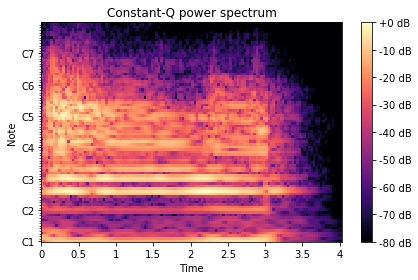

In [173]:
# Extract its features
C = np.abs(librosa.cqt(y, sr=sr, hop_length=512, n_bins=84, bins_per_octave=12))
librosa.display.specshow(librosa.amplitude_to_db(C[:,:], ref=np.max),sr=sr, x_axis='time', y_axis='cqt_note')
plt.colorbar(format='%+2.0f dB')
plt.title('Constant-Q power spectrum')
plt.tight_layout()
plt.show()

In [0]:
# Review Which Families actually have the range of pitches needed,
# that is from C1 (24 in MIDI) to C4 (61 in MIDI)
instruments = {}
for dataset_fold in dataset_folds:
  distros_dict = dataset_folds[dataset_fold]
  for distro in distros_dict:
    if (distros_dict[distro]['velocity']==127 and (distros_dict[distro]['pitch'] >= 24 and distros_dict[distro]['pitch'] <= 60) and (distros_dict[distro]['instrument_source_str'] == 'acoustic')):
      if (distros_dict[distro]['instrument_str'] in instruments):
        instruments[distros_dict[distro]['instrument_str']].append(distros_dict[distro])
      else:
        instruments[distros_dict[distro]['instrument_str']] = []
        instruments[distros_dict[distro]['instrument_str']].append(distros_dict[distro])
elements_to_remove = []
for instrument in instruments:
  if (len(instruments[instrument]) != 37):
    elements_to_remove.append(instrument)

for instrument in elements_to_remove:
  del instruments[instrument]

In [0]:
# Order the instruments with the needed pitch range per family
families = {}
for instrument_key in instruments:
  for instrument in instruments[instrument_key]:
    if (instrument['instrument_family_str'] in families):
      families[instrument['instrument_family_str']].append(instrument)
    else:
      families[instrument['instrument_family_str']] = []
      families[instrument['instrument_family_str']].append(instrument)

In [136]:
for family in families:
    print(family)
    print(len(families[family]))

keyboard
703
mallet
1850
string
814
guitar
962
reed
333
brass
518
flute
74
bass
37


In [0]:
# Selected string, guitar and brass families
families_to_use = {'string', 'guitar', 'brass'}
families = {}
for instrument_key in instruments:
  for instrument in instruments[instrument_key]:
    if (instrument['instrument_family_str'] in families_to_use):
      if (instrument['instrument_family_str'] in families):
        families[instrument['instrument_family_str']].append(instrument)
      else:
        families[instrument['instrument_family_str']] = []
        families[instrument['instrument_family_str']].append(instrument)

In [138]:
for family in families:
    print(family)
    print(len(families[family]))

string
814
guitar
962
brass
518


In [0]:
# Use only 14 instruments that is the minimum number of instruments in one family, that is brass.
instruments_to_use_per_family = {}
for instrument_key in instruments:
  for instrument in instruments[instrument_key]:
    if (instrument['instrument_family_str'] in families_to_use):
      if (not instrument['instrument_family_str'] in instruments_to_use_per_family):
        instruments_to_use_per_family[instrument['instrument_family_str']] = {}

      if (instrument_key in instruments_to_use_per_family[instrument['instrument_family_str']]):
        instruments_to_use_per_family[instrument['instrument_family_str']][instrument_key].append(instrument)
      else:
        if (len(instruments_to_use_per_family[instrument['instrument_family_str']]) < 14):
          instruments_to_use_per_family[instrument['instrument_family_str']][instrument_key] = []
          instruments_to_use_per_family[instrument['instrument_family_str']][instrument_key].append(instrument)

In [140]:
for family in instruments_to_use_per_family:
    print(family)
    print(len(instruments_to_use_per_family[family]))

string
14
guitar
14
brass
14


In [174]:
# An example of a instrument note element
instruments_to_use_per_family['brass']['brass_acoustic_006'][0]

{'note_str': 'brass_acoustic_006-043-127',
 'sample_rate': 16000,
 'qualities_str': ['reverb'],
 'instrument_source': 0,
 'instrument_family_str': 'brass',
 'instrument_family': 1,
 'note': 53343,
 'instrument_source_str': 'acoustic',
 'qualities': [0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
 'pitch': 43,
 'instrument_str': 'brass_acoustic_006',
 'instrument': 43,
 'velocity': 127}

In [0]:
# Extract features
family_note_features = []
for family in instruments_to_use_per_family:
  for instrument_name in instruments_to_use_per_family[family]:
    for instrument_note in instruments_to_use_per_family[family][instrument_name]:
      filename = dataset_basepath + audios_subpath + instrument_note['note_str'] + ".wav"
      y, sr = librosa.load(filename,sr=None)
      C = np.abs(librosa.cqt(y, sr=sr, hop_length=512, n_bins=84, bins_per_octave=12))
      for j in range(16):
        current_segment = []
        segment_name = instrument_note['note_str'] + "_seg_" + str(j)
        current_segment.append(segment_name)
        for k in range(84):
            current_segment.append(C[k][j])
        current_segment.append("family_" + family + "_note_" + str(instrument_note['pitch']))
        family_note_features.append(current_segment)
family_note_features = np.array(family_note_features)

In [0]:
# Prepare DataFrame
column_names = ["segment_name"]
base_note_name = "note_"
for i in range(84):
    note_name = base_note_name + str(i + 24)
    column_names.append(note_name)
column_names.append("NOTE_CLASS")
family_instruments_df = pd.DataFrame(data=family_note_features[:,:], columns=column_names)

In [0]:
# We Save Pandas CSV
family_instruments_df.to_csv("family_note_features.csv", index=False)

In [0]:
# We also save it with index True
family_instruments_df.to_csv("family_note_features_with_index.csv", index=True)